In [1]:
from qsim import VERSION

VERSION

'37fe90dadfcc42989706c5f4b6ad633b556fcbda'

# Imports

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from experiments.leakage_cnot_after_convergence.leakage_cnot import (
    LeakageCNOTSFB_TCNOT,
    LeakageCNOTSFB_TCNOT_TIdle,
)
from qsim.utils.utils import generate_plot_params
from qsim.utils.quantum_guidelines import plot_setup
import matplotlib.pyplot as plt

marker_list = ["o", "s", "v", "^", "<", ">", "D", "X", "P"]

generate_plot_params()
import numpy as np

# Script

`experiments/leakage_cnot_after_convergence/leakage_cnot.py`

# Single Simulation

## `LeakageCNOTSFB_TCNOT_TIdle`

In [4]:
exp = LeakageCNOTSFB_TCNOT_TIdle(
    nbar_list=[4, 6, 8],
    gate_time_list=[1],
)

In [15]:
exp.verbose = True
exp.get_target_leakage_post_idle()

target leakage after idle
1.3239677422172136e-05


In [ ]:
from qsim.basis.sfb import SFB
from qsim.physical_gate.idle import IdleGateSFB

basis = SFB(nbar=4, d=10)

idle = IdleGateSFB(nbar=4, k1=0, k2=1, gate_time=1.0)
idle.initial_state_name = "LeakedTargetCNOT"
idle.truncature = 10
idle.num_tslots_pertime = 1000
idle.basis = basis
# idle.get_data()

## LeakageCNOTSFB_TCNOT

In [16]:
%%time

exp = LeakageCNOTSFB_TCNOT(
    nbar_list=[4, 6, 8],
    gate_time_list=[1],
)
exp.single_simulation(nbar=4, gate_time=1.0)

1 dissipators
CPU times: user 5min 12s, sys: 34.4 s, total: 5min 46s
Wall time: 2min 13s


In [17]:
exp.verbose = True
exp.get_target_leakage_post_idle()

target leakage after idle
1.3239677422172136e-05


In [3]:
exp = LeakageCNOTSFB_TCNOT(
    nbar_list=[4, 6, 8],
    gate_time_list=list(np.logspace(-2, 1, 30)),
)
# exp.get_data()
# print(exp.data)

# Plotting results

In [5]:
data_tcnot_tidle = np.load("data_tcnot_tidle.npy", allow_pickle=True).item()

(ordonnee, label)=('pIX', '$p_{\\mathrm{IX}}$')
(ordonnee, label)=('leakage_pre_idle', '$p_{l_{\\mathrm{1}}}$')
(ordonnee, label)=('leakage_post_idle', '$p_{l_{\\mathrm{2}}}$')
(ordonnee, label)=('pIX', '$p_{\\mathrm{IX}}$')
(ordonnee, label)=('leakage_pre_idle', '$p_{l_{\\mathrm{1}}}$')
(ordonnee, label)=('leakage_post_idle', '$p_{l_{\\mathrm{2}}}$')
(ordonnee, label)=('pIX', '$p_{\\mathrm{IX}}$')
(ordonnee, label)=('leakage_pre_idle', '$p_{l_{\\mathrm{1}}}$')
(ordonnee, label)=('leakage_post_idle', '$p_{l_{\\mathrm{2}}}$')


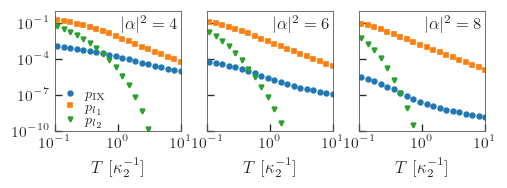

In [21]:
nbar_list = [4, 6, 8]
exp = LeakageCNOTSFB_TCNOT_TIdle(
    nbar_list=nbar_list,
    gate_time_list=[1],
)


fig = plot_setup(aspect_ratio=0.35, width_ratio=0.6, wide=True)
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132, sharey=ax1)
ax3 = fig.add_subplot(133, sharey=ax1)
axs = [ax1, ax2, ax3]

exp.data = data_tcnot_tidle
exp.plot(axs=axs, marker_list=marker_list)

for i, (ax, nbar) in enumerate(zip(axs, nbar_list)):
    # generate_ax_params(ax=ax)
    ax.set_title("")
    ax.set_xlim(1e-1, 10)
    try:
        ax.get_legend().remove()
    except AttributeError:
        pass
    ax.text(
        0.98,
        0.86,
        s=f"$|\\alpha|^2={nbar}$",
        horizontalalignment="right",
        transform=ax.transAxes,
    )
    ax.set_ylabel("")
    if i > 0:
        ax.yaxis.set_tick_params(labelleft=False)

# fig.suptitle("")
axs[0].legend(
    handletextpad=0.0,
    labelspacing=0.,
    frameon=False,
    bbox_to_anchor=(-0.08, -0.07), loc='lower left'
)
plt.tight_layout(pad=0.0)
# generate_ax_params(ax)
plt.savefig("leakage_vs_bitflip_changing_idle.pdf")
plt.show()